In [1]:
# import special packages
import os
import math
import folium
import rasterio
import rioxarray as rxr
import numpy as np
import pandas as pd
import geopandas as gpd
import shapely.geometry as sg
import matplotlib.pyplot as plt

from matplotlib import pyplot
from math import radians, cos, sin, asin, sqrt
from folium.plugins import MeasureControl
from IPython.display import display
from shapely.geometry import Polygon
from shapely.geometry import box
from pyproj import CRS, Transformer

In [2]:
home_directory = os.path.expanduser( '~' )
os.chdir(home_directory + '/DS_Project/modules')

import pickle
import yaml
config_path = 'config.yml'
with open(config_path, 'r') as f:
    config = yaml.load(f, Loader=yaml.FullLoader)

In [3]:
from data_retrieval.Ecostress.utils import *
from models.UHI_modeling.disaggregate import *

In [ ]:
path = config['data']['dwd'] + '/uhi_model/'

In [4]:
grid_size_meters = 1000
with open(path + 'uhi_features_grid' + grid_size_meters + '.pkl', 'rb') as file:
    surface_df = pickle.load(file)
with open(path + 'grid' + grid_size_meters + '_a.pkl', 'rb') as file:
    grid_1000 = pickle.load(file)

In [5]:
grid_polygon_index = 5
subset = grid_1000.iloc[grid_polygon_index,:].geometry

## Extract target

In [6]:
path_tif = config['data']['data'] + '/ECOSTRESS/mean_afterNoon_HT.tif'
src = rasterio.open(path_tif)
dataarray = rxr.open_rasterio(path_tif)

In [ ]:
lst_map = tiffs_to_foliumMap(path_tif)
folium.GeoJson(subset.__geo_interface__, 
                style_function=lambda x: {'fillColor': 'grey', 'fillOpacity': 0.2, 'color': 'black', 'colorOpacity': 0.7}
                ).add_to(lst_map)
lst_map

In [ ]:
lst_map.save(path + 'lst.html')

In [55]:
out_image, transformed = rasterio.mask.mask(src, [subset], all_touched=True, crop=True, filled=False)
clip_all = dataarray.rio.clip([subset], crs=4326, all_touched=True)
print(out_image.shape)
print(clip_all.shape)

(1, 15, 22)
(1, 15, 22)


In [53]:
clip_all

<xarray.DataArray (band: 1, y: 15, x: 22)>
array([[[38.8, 38.8, 38.6, 39. , 39. , 39. , 39. , 39.2, 39. , 38.8,
         39. , 38.4, 38.4, 38. , 38. , 37.8, 38.2, 38.2, 38. , 38.2,
         38.2, 38.8],
        [38.6, 38.8, 38.6, 38.4, 38.6, 38.6, 38.6, 38.6, 38.4, 38.6,
         38.2, 38.6, 38.4, 38.2, 38.2, 38.2, 38. , 37.6, 38. , 38.2,
         38.2, 38.8],
        [38.8, 38.8, 38.8, 39. , 38.6, 38.8, 38.8, 38.6, 38.2, 38. ,
         38.2, 38.4, 38.4, 38.6, 38.6, 38.2, 38. , 38. , 38.6, 39. ,
         39.4, 39.2],
        [38.6, 38.8, 38.8, 38.8, 38.6, 38.6, 38.4, 37.8, 37.6, 37.6,
         37.8, 38.2, 38.4, 38.6, 38.8, 38.2, 38.4, 39. , 38.8, 38.8,
         39.4, 39. ],
        [38.8, 38.6, 38.8, 38.8, 38.8, 38.2, 37.4, 37.2, 37.2, 37.4,
         37.8, 38.4, 38.6, 39. , 39.2, 38.8, 38.4, 38.2, 38.4, 38.8,
         38.6, 38.2],
        [38.2, 38.4, 38.4, 38.4, 38. , 37.4, 36.8, 36.6, 37.2, 37.2,
         37.6, 37.8, 38.4, 38.6, 39. , 38.8, 38.6, 38.4, 38. , 38. ,
         38.4, 38.2],
        [39. , 38.4, 38.2, 37.8, 37.4, 37. , 36.6, 36.2, 36.6, 37.4,
         37.6, 37.8, 37.8, 38.8, 38.8, 38.8, 39. , 38.6, 38.4, 38.2,
...
         37.4, 37.2, 37.2, 37. , 37.4, 37.8, 38. , 38.2, 38. , 37.6,
         36.2, 35.6],
        [38.2, 38.2, 38. , 36.4, 36. , 36. , 36.6, 35.8, 36.2, 36.6,
         36.6, 37. , 37. , 36.8, 37.4, 37.6, 38. , 38. , 37. , 36.6,
         34.8, 35.8],
        [38.6, 38. , 37.6, 37. , 36.8, 36.8, 36.6, 36.2, 36.6, 37. ,
         36.4, 37.2, 37. , 37. , 37.6, 38. , 37. , 36. , 35. , 34.8,
         35. , 34.8],
        [38.4, 38.4, 38. , 37.8, 37. , 37.2, 37.8, 37. , 36.8, 36.8,
         37. , 37.4, 37.4, 37. , 36.4, 35.8, 35.4, 34.4, 34. , 34.2,
         34.2, 34.8],
        [39. , 38. , 38. , 37.4, 36.8, 36.8, 37.6, 37.6, 36.8, 37. ,
         37.2, 37. , 36.4, 35.8, 34.6, 34.2, 33.8, 33.8, 34.2, 34.6,
         34.6, 35.4],
        [39. , 38.2, 37.8, 37.2, 37. , 36.8, 37.2, 37.2, 38. , 37.8,
         36.8, 35.6, 34.8, 34. , 33.8, 33.4, 33.8, 34.2, 34.2, 34.8,
         35.4, 36. ],
        [38.6, 38.2, 37. , 37. , 36.6, 36.8, 37.4, 37.2, 37.4, 36.2,
         35.6, 34.4, 34. , 33.4, 33.6, 34.2, 34.4, 34.4, 34.6, 35. ,
         35.8, 36.2]]])
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 11.56 11.56 11.56 11.56 ... 11.57 11.57 11.57 11.57
  * y            (y) float64 48.13 48.13 48.13 48.13 ... 48.13 48.12 48.12 48.12
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0

In [51]:
def pixels_to_foliumMap(array, polygon):

    data = np.array(array)[0]

    color_range = np.linspace(0, 1, 256)
    colors_jet_rgba = plt.cm.jet(color_range)

    colors_jet_hex = [mcolors.rgb2hex(color) for color in colors_jet_rgba]

    cmap = plt.colormaps['jet']
    norm = colors.Normalize(vmin=data.min(), vmax=data.max())
    colored_data = cmap(norm(data))

    image_bounds = box(*array.rio.bounds())
    min_x, min_y, max_x, max_y = array.rio.bounds()
    corner_coordinates = [[min_y, min_x], [max_y, max_x]]

    m = folium.Map(
        location=[image_bounds.centroid.y, image_bounds.centroid.x],
        zoom_start=15,
     )

    folium.GeoJson(
        image_bounds.__geo_interface__,
        style_function=lambda x: {'fill': False, 'color': 'orange', 'colorOpacity': 0.7}
    ).add_to(m)

    folium.TileLayer(
        tiles='CartoDB positron',
        attr='CartoDB',
        transparent=True,
    ).add_to(m)

    folium.raster_layers.ImageOverlay(
        colored_data,
        bounds=corner_coordinates,
        opacity=0.5,
        interactive=True,
        cross_origin=True,
        pixelated=True,
        zindex=0.2
    ).add_to(m)

    colormap = cm.LinearColormap(
        colors=colors_jet_hex,
        vmin=data.min(),
        vmax=data.max(),
        max_labels=15
    )

    colormap.caption = 'Land surface temperature in celsius'
    colormap.add_to(m)

    folium.GeoJson(
        polygon.__geo_interface__,
        style_function=lambda x: {'fill': False, 'color': 'black', 'colorOpacity': 0.7}
    ).add_to(m)

    return m

In [50]:
lst_pixel_map = pixels_to_foliumMap(clip_all, subset)
lst_pixel_map

In [10]:
lst_pixel_map.save(config['data']['data'] + '/uhi_model/lst_pixel_map.html')

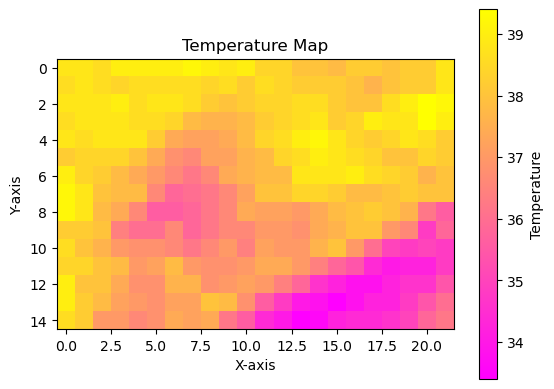

In [63]:
temperature_data = clip_all[0].values

fig, ax = plt.subplots()
im = ax.imshow(temperature_data, cmap='spring', aspect='equal')

cbar = plt.colorbar(im, ax=ax)
cbar.set_label('Temperature')

ax.set_title('Temperature Map')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')

plt.show()

In [20]:
array = clip_all
data = np.array(array)[0]

color_range = np.linspace(0, 1, 256)
colors_jet_rgba = plt.cm.jet(color_range)

colors_jet_hex = [mcolors.rgb2hex(color) for color in colors_jet_rgba]

cmap = plt.colormaps['jet']
norm = colors.Normalize(vmin=data.min(), vmax=data.max())
colored_data = cmap(norm(data))

image_bounds = box(*array.rio.bounds())
min_x, min_y, max_x, max_y = array.rio.bounds()
corner_coordinates = [[min_y, min_x], [max_y, max_x]]

In [26]:
image_bounds.area

0.13061415311993335

In [11]:
print(clip_all[0].shape)
clip_inner = dataarray.rio.clip([subset],all_touched=False)
print(clip_inner[0].shape)

(15, 22)
(14, 21)


In [12]:
def bounding_box(points):
    x_coordinates, y_coordinates = zip(*points)
    return min(x_coordinates), min(y_coordinates), max(x_coordinates), max(y_coordinates)

In [13]:
np.array(clip_all).size

330

In [14]:
minx, miny, maxx, maxy = clip_all.rio.bounds()
p_minx, p_miny, p_maxx, p_maxy = bounding_box(list(subset.exterior.coords))
print(p_minx,p_maxx,p_miny,p_maxy)
print(minx,maxx,miny,maxy)

11.561036867521763 11.574491735043525 48.123209111749915 48.13219222349983
11.560695671110404 11.574536459548055 48.12282398833402 48.13226088954151


In [15]:
# nach unten
print(haversine(p_minx, p_miny, p_minx, miny)*1000)
# nach rechts
print(haversine(p_maxx, p_miny, maxx, p_miny)*1000)
# nach oben
print(haversine(p_maxx, p_maxy, p_maxx, maxy)*1000)
# nach links
print(haversine(p_minx, p_maxy, minx, p_maxy)*1000)

42.82376997923898
3.3197237744542414
7.635315468444093
25.321236121031735


In [16]:
weights = np.ones_like(clip_all[0].values)
print(weights)

[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.

In [17]:
a = 70
bottom = haversine(p_minx, p_miny, p_minx, miny)*1000
right = haversine(p_maxx, p_miny, maxx, p_miny)*1000
top = haversine(p_maxx, p_maxy, p_maxx, maxy)*1000
left = haversine(p_minx, p_maxy, minx, p_maxy)*1000
print(bottom, right, top, left)

42.82376997923898 3.3197237744542414 7.635315468444093 25.321236121031735


In [123]:
# weights[0,:]

[[[38.8 38.6 39.  39.  39.  39.  39.2 39.  38.8 39.  38.4 38.4 38.  38.
   37.8 38.2 38.2 38.  38.2 38.2 38.8]
  [38.8 38.6 38.4 38.6 38.6 38.6 38.6 38.4 38.6 38.2 38.6 38.4 38.2 38.2
   38.2 38.  37.6 38.  38.2 38.2 38.8]
  [38.8 38.8 39.  38.6 38.8 38.8 38.6 38.2 38.  38.2 38.4 38.4 38.6 38.6
   38.2 38.  38.  38.6 39.  39.4 39.2]
  [38.8 38.8 38.8 38.6 38.6 38.4 37.8 37.6 37.6 37.8 38.2 38.4 38.6 38.8
   38.2 38.4 39.  38.8 38.8 39.4 39. ]
  [38.6 38.8 38.8 38.8 38.2 37.4 37.2 37.2 37.4 37.8 38.4 38.6 39.  39.2
   38.8 38.4 38.2 38.4 38.8 38.6 38.2]
  [38.4 38.4 38.4 38.  37.4 36.8 36.6 37.2 37.2 37.6 37.8 38.4 38.6 39.
   38.8 38.6 38.4 38.  38.  38.4 38.2]
  [38.4 38.2 37.8 37.4 37.  36.6 36.2 36.6 37.4 37.6 37.8 37.8 38.8 38.8
   38.8 39.  38.6 38.4 38.2 37.6 38. ]
  [38.8 38.  37.8 37.8 36.6 35.8 36.  36.2 36.6 37.2 38.  38.  38.4 38.4
   38.2 37.8 37.8 38.  38.2 38.  38. ]
  [38.8 37.8 37.4 36.6 35.6 35.6 35.8 36.2 36.6 37.4 37.2 37.2 37.  37.4
   37.8 38.  38.2 38.  37.6 36.2 